In [624]:
import numpy as np
import pandas as pd
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [625]:
# Connect to the SQLite database
conn = sqlite3.connect("../db.sqlite3")

# Execute SQL query to combine tables and read into DataFrame
query = '''
    SELECT *
    FROM restaurant_product
    JOIN restaurant_orderitem ON restaurant_product.id = restaurant_orderitem.product_id
    JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
'''
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

df = (
    df[["product_id", "name", "price", "order_id", "quantity", "datetime"]]
    .rename(
        columns={
            "name": "product_name",
            "price": "product_price",
            "quantity": "order_quantity",
            "datetime": "order_datetime"}
    )
)

df["order_datetime"] = pd.to_datetime(df["order_datetime"])

# Define CSV file path
csv_file_path = "../restaurant_combined_data.csv"

# Save DataFrame to CSV
df.to_csv(csv_file_path)

len(df)

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 products by order quantity'}>

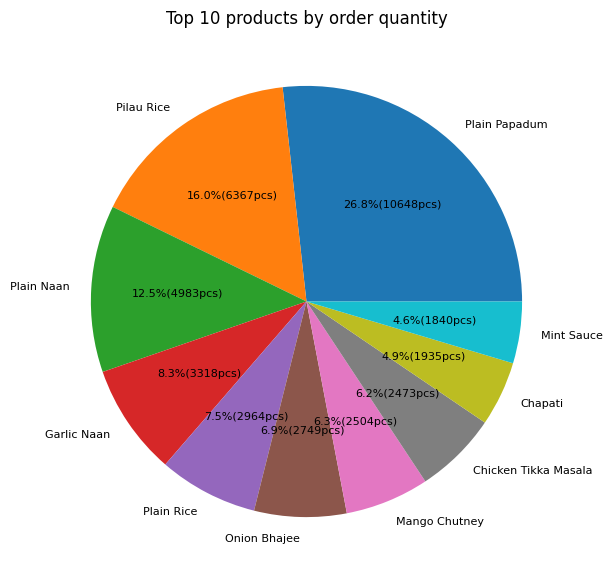

In [626]:
top_ten_by_qty = (
    df
    .groupby("product_name")
    ["order_quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

def make_autopct(percentage):
    total = sum(top_ten_by_qty)
    price = percentage * total / 100
    return f"{percentage:.1f}%({price:.0f}pcs)"

top_ten_by_qty.plot(
    kind="pie",
    y="order_quantity",
    title="Top 10 products by order quantity",
    autopct=make_autopct,
    legend=False,
    figsize=(7,7),
    ylabel="",
    textprops={'fontsize': 8}
)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 products by item price'}>

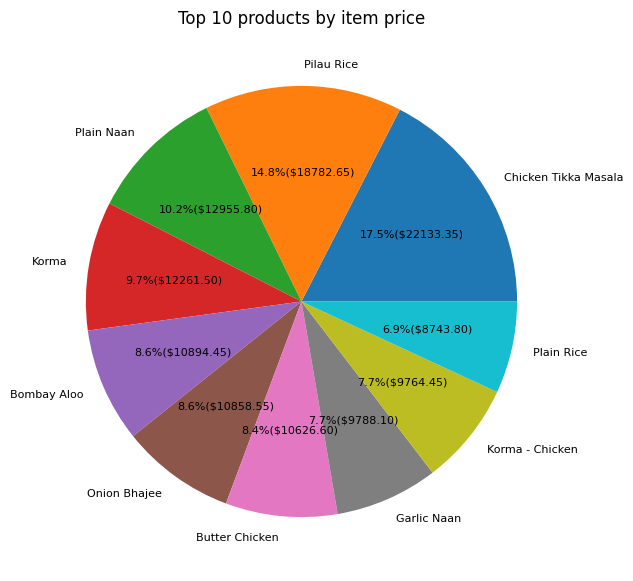

In [627]:
df["item_price"] = df["product_price"] * df["order_quantity"]
top_ten_by_item_price = (
    df
    .groupby("product_name")
    ["item_price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

def make_autopct(percentage):
    total = sum(top_ten_by_item_price)
    price = percentage * total / 100
    return f"{percentage:.1f}%(${price:.2f})"

top_ten_by_item_price.plot(
    kind="pie",
    y="order_quantity",
    title="Top 10 products by item price",
    autopct=make_autopct,
    legend=False,
    figsize=(7,7),
    ylabel="",
    textprops={'fontsize': 8}
)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: title={'center': 'Total restaurant income based on the hour order '}, xlabel='Order by hour', ylabel='Total income'>

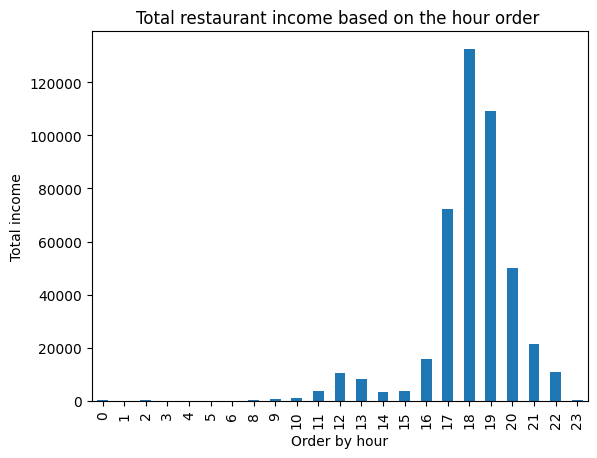

In [628]:
df["order_hour"] = df["order_datetime"].dt.hour
hourly_group = df.groupby("order_hour")["item_price"].sum()
hourly_group.plot(
    kind="bar",
    ylabel="Total income",
    xlabel="Order by hour",
    title="Total restaurant income based on the hour order ",
)

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: title={'center': 'Total restaurant income based on the hour order '}, xlabel='Order by day', ylabel='Total income'>

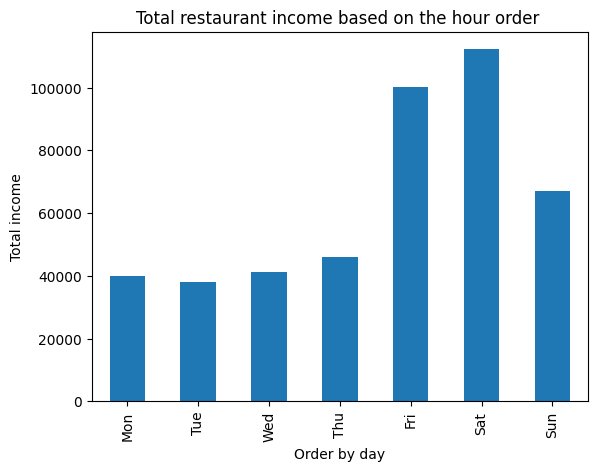

In [629]:
df["day_of_week"] = df["order_datetime"].dt.dayofweek

df["day_of_week"] = df["order_datetime"].dt.dayofweek
daily_group = df.groupby("day_of_week")["item_price"].sum()

# Define custom day names
custom_day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Set the index of daily_group to custom day names
daily_group.index = custom_day_names

daily_group.plot(
    kind="bar",
    ylabel="Total income",
    xlabel="Order by day",
    title="Total restaurant income based on the hour order ",
)